In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import os

In [2]:
SIZES = [10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]

In [3]:
df = pd.DataFrame(columns=['Grid Size', 'Time (s)', 'Type'])
for S in SIZES:
    match_comparison = f'_{S}.csv'
    for f_name in os.listdir('mazes'):
        if match_comparison not in f_name or 'run_times' not in f_name:
            continue
            
        temp_df = pd.read_csv(os.path.join('mazes', f_name))
        for _, row in temp_df.iterrows():
            df = df.append({'Grid Size': S, 'Time (s)': row['G'], 'Type': 'G'}, ignore_index=True)
            df = df.append({'Grid Size': S, 'Time (s)': row['HG'], 'Type': 'HG'}, ignore_index=True)

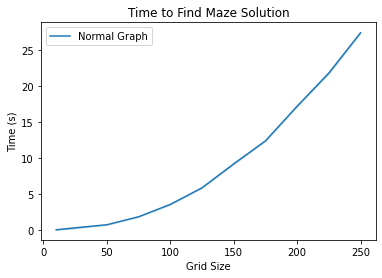

In [4]:
sns.lineplot(data=df[df['Type'] == 'G'], x="Grid Size", y='Time (s)', label='Normal Graph')
plt.title('Time to Find Maze Solution')
plt.savefig('G.png', facecolor='WHITE')

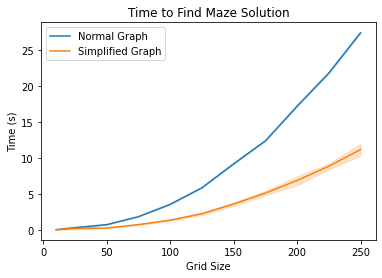

In [5]:
plt.title('Time to Find Maze Solution')
sns.lineplot(data=df[df['Type'] == 'G'], x="Grid Size", y='Time (s)', label='Normal Graph')
sns.lineplot(data=df[df['Type'] == 'HG'], x="Grid Size", y='Time (s)', label='Simplified Graph')
plt.savefig('G_HG.png', facecolor='WHITE')

# Node and Edge Comparison

In [6]:
df = pd.DataFrame(columns=['Grid Size', 'Type', 'Nodes', 'Edges'])
for name in os.listdir('mazes'):
    base_path = os.path.join('mazes', name)
    if not os.path.isdir(base_path):
        continue
        
    seed, size = name.split('_')
    with open(os.path.join(base_path, 'maze_graph.pkl'), 'rb') as f:
        G = pickle.load(f)

    with open(os.path.join(base_path, 'maze_hyper_graph.pkl'), 'rb') as f:
        HG = pickle.load(f) 
    
    df = df.append({'Grid Size': int(size), 'Type': 'Normal Graph', 'Nodes': float(len(G.nodes)), 'Edges': float(len(G.edges))}, ignore_index=True)
    df = df.append({'Grid Size': int(size), 'Type': 'Simplified Graph', 'Nodes': float(len(HG.nodes)), 'Edges': float(len(HG.edges))}, ignore_index=True)

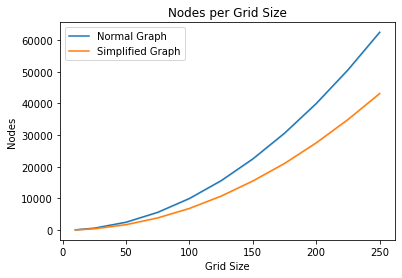

In [7]:
plt.title('Nodes per Grid Size')
sns.lineplot(data=df[df['Type'] == 'Normal Graph'], x="Grid Size", y='Nodes', label='Normal Graph')
sns.lineplot(data=df[df['Type'] == 'Simplified Graph'], x="Grid Size", y='Nodes', label='Simplified Graph')
plt.savefig('nodes.png', facecolor='WHITE')

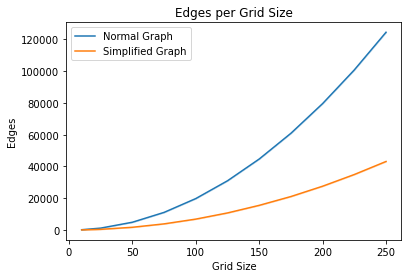

In [8]:
plt.title('Edges per Grid Size')
sns.lineplot(data=df[df['Type'] == 'Normal Graph'], x="Grid Size", y='Edges', label='Normal Graph')
sns.lineplot(data=df[df['Type'] == 'Simplified Graph'], x="Grid Size", y='Edges', label='Simplified Graph')
plt.savefig('edges.png', facecolor='WHITE')

In [22]:
sg = df[df['Type'] == 'Simplified Graph']
g = df[df['Type'] == 'Normal Graph']

In [44]:
percent_decrease_nodes = []
percent_decrease_edges = []
for s in SIZES:
    start_nodes = g[g['Grid Size'] == s].Nodes.iloc[0]
    start_edges = g[g['Grid Size'] == s].Edges.iloc[0] 
    
    for n in sg[sg['Grid Size'] == s].Nodes:
        percent_decrease_nodes.append((start_nodes - n)/start_nodes)
    for e in sg[sg['Grid Size'] == s].Edges:
        percent_decrease_edges.append((start_edges - e)/start_edges)

In [45]:
print(f'Average Percent Decrease in Nodes: {sum(percent_decrease_nodes) / len(percent_decrease_nodes)}')
print(f'Average Percent Decrease in Edges: {sum(percent_decrease_edges) / len(percent_decrease_edges)}')

Average Percent Decrease in Nodes: 0.3138216044595616
Average Percent Decrease in Edges: 0.6504623752632142
